<a href="https://colab.research.google.com/github/tingtingting118/RSclass/blob/master/Employee_churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [77]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [0]:
test.shape

(294, 35)

In [0]:
train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0


In [0]:
train.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
user_id                     1176 non-null int64
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus          

In [80]:
#data exploration 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape

(1176, 36)

In [81]:
train.describe(include = 'all')
#https://app.dataquest.io/m/294/guided-project%3A-exploring-ebay-car-sales-data - refer this project for data cleaning and exploration

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176,1176,1176.000000,1176,1176.000000,1176.000000,1176,1176.0,1176.000000,1176.000000,1176,1176.000000,1176.000000,1176.000000,1176,1176.000000,1176,1176.000000,1176.000000,1176.000000,1176,1176,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
unique,NaN,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,988,830,NaN,772,NaN,NaN,490,NaN,NaN,NaN,713,NaN,NaN,NaN,258,NaN,524,NaN,NaN,NaN,1176,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.124150,36.805272,NaN,NaN,802.033163,NaN,9.159864,2.918367,NaN,1.0,1026.960034,2.750850,NaN,65.130102,2.724490,2.055272,NaN,2.732993,NaN,6458.690476,14247.159864,2.703231,NaN,NaN,15.152211,3.150510,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,NaN,NaN,405.946729,NaN,8.137224,1.009809,NaN,0.0,594.763609,1.096221,NaN,20.294326,0.715027,1.106040,NaN,1.102477,NaN,4724.845883,7133.767499,2.521301,NaN,NaN,3.652543,0.357723,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,NaN,NaN,104.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,NaN,NaN,463.500000,NaN,2.000000,2.000000,NaN,1.0,498.750000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2858.750000,7912.750000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,NaN,NaN,805.500000,NaN,7.000000,3.000000,NaN,1.0,1031.000000,3.000000,NaN,65.000000,3.000000,2.000000,NaN,3.000000,NaN,4850.500000,14225.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,NaN,NaN,1162.000000,NaN,14.000000,4.000000,NaN,1.0,1555.250000,4.000000,NaN,82.250000,3.000000,3.000000,NaN,4.000000,NaN,8380.250000,20372.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000


In [82]:
#Data Cleaning - Combine train and test data for convinence.
full_data = train.append(test,ignore_index = True)
#drop columns that would not help for prediction 
#user_id,EmployeeNumber, EmployeeCount,Over18,StandardHours
full_data = full_data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [83]:
#Explore the data by rate in terms of Whether the employee left the job or not
for col in cols:
  if full_data[col].dtype =='int64':
    print(col + ": ")
    print((full_data[full_data['Attrition'] =='Yes'][col].value_counts() / full_data[col].value_counts()).sort_index(ascending = True))
    print("----------------")



Age: 
18    0.500000
19    0.555556
20    0.545455
21    0.461538
22    0.125000
23    0.214286
24    0.192308
25    0.153846
26    0.282051
27    0.062500
28    0.208333
29    0.235294
30    0.150000
31    0.202899
32    0.131148
33    0.189655
34    0.090909
35    0.102564
36    0.057971
37    0.100000
38    0.017241
39    0.095238
40    0.070175
41    0.075000
42    0.021739
43    0.062500
44    0.151515
45    0.024390
46    0.090909
47    0.125000
48    0.105263
49    0.083333
50    0.100000
51    0.105263
52    0.111111
53    0.052632
54         NaN
55    0.090909
56    0.142857
57         NaN
58    0.285714
59         NaN
60         NaN
Name: Age, dtype: float64
----------------
DailyRate: 
102     NaN
103     NaN
104     1.0
105     NaN
106     NaN
       ... 
1492    NaN
1495    NaN
1496    NaN
1498    NaN
1499    NaN
Name: DailyRate, Length: 886, dtype: float64
----------------
DistanceFromHome: 
1     0.100962
2     0.104265
3     0.142857
4     0.125000
5     0.123077
6     

In [84]:
#quickly explore the data 
for col in cols:
  if full_data[col].dtype =='object':
    print(col + ": ")
    print((full_data[full_data['Attrition'] =='Yes'][col].value_counts() / full_data[col].value_counts()).sort_index(ascending = True))
    print("----------------")

BusinessTravel: 
Non-Travel           0.060000
Travel_Frequently    0.202166
Travel_Rarely        0.117929
Name: BusinessTravel, dtype: float64
----------------
Department: 
Human Resources           0.174603
Research & Development    0.109261
Sales                     0.161435
Name: Department, dtype: float64
----------------
EducationField: 
Human Resources     0.259259
Life Sciences       0.112211
Marketing           0.182390
Medical             0.101293
Other               0.121951
Technical Degree    0.204545
Name: EducationField, dtype: float64
----------------
Gender: 
Female    0.112245
Male      0.138322
Name: Gender, dtype: float64
----------------
JobRole: 
Healthcare Representative    0.061069
Human Resources              0.211538
Laboratory Technician        0.196911
Manager                      0.039216
Manufacturing Director       0.041379
Research Director            0.012500
Research Scientist           0.123288
Sales Executive              0.131902
Sales Representativ

In [0]:
###EducationField, Travel have a bigger impact on the churn rate, also, people who are singles are more likely to leave
#ppl have to work overtime is likely to leave

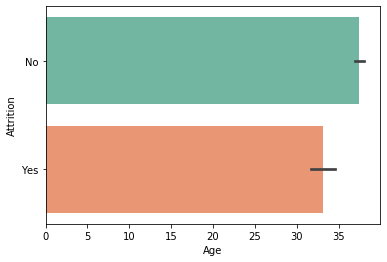

In [86]:
import seaborn as sns
sns.barplot(x = 'Age', y = 'Attrition',data = full_data,palette = 'Set2')

In [87]:
full_data['Attrition_1'] = 0
full_data['Attrition_1'][full_data['Attrition'] == 'Yes']  = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
full_data.Attrition_1.describe()

count    1470.000000
mean        0.127891
std         0.334082
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition_1, dtype: float64

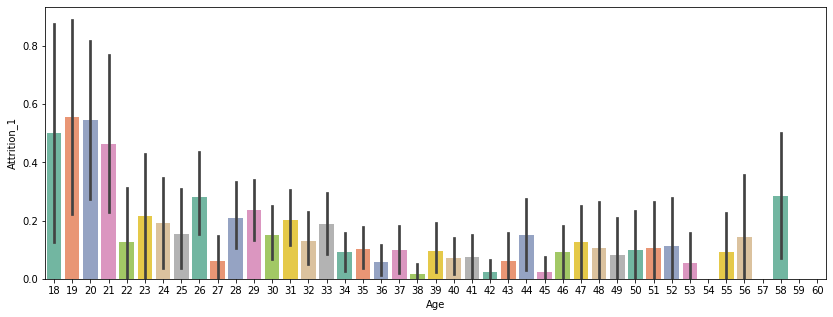

In [89]:
plt.figure(figsize = (14,5))
sns.barplot(x = 'Age',y='Attrition_1',data = full_data,palette = 'Set2')

In [0]:
## It's clear that from age 22 to 54, people are less likely to leave the work
#reset Age to Ordinary value 
#full_data['AgeSet'] = 2
#full_data[(full_data['Age']<= 24) | (full_data['Age'] == 58)]['Ageset'] = 1
#full_data[(full_data['Age'] == 54 )| (full_data['Age'] == 57) | (full_data['Age'] >=59)]['AgeSet'] = 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


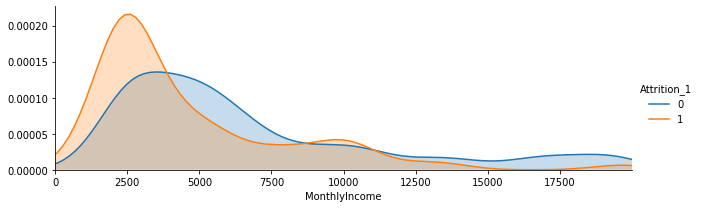

In [90]:
#https://zhuanlan.zhihu.com/p/27816821
#monthly Income
facet = sns.FacetGrid(full_data,hue = 'Attrition_1' ,aspect=3)  #a way to visualized multi-dimensional data ( 3 dimensions here--> row, col, hue)
facet.map(sns.kdeplot,'MonthlyIncome',shade = True)

#map is a function to pass ur chart -->sns.kdeplot here 
facet.set(xlim=(0,full_data['MonthlyIncome'].max()))
facet.add_legend()
#we learned that people have monthly income within 7.5k is more likely to leave 

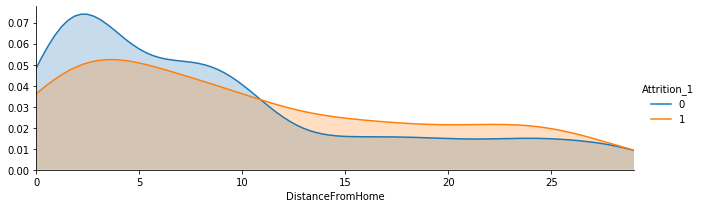

In [91]:
#DistanceFromHome
facet2 = sns.FacetGrid(full_data,hue = 'Attrition_1' ,aspect=3)  #a way to visualized multi-dimensional data ( 3 dimensions here--> row, col, hue)
facet2.map(sns.kdeplot,'DistanceFromHome',shade = True)

#map is a function to pass ur chart -->sns.kdeplot here 
facet2.set(xlim=(0,full_data['DistanceFromHome'].max()))
facet2.add_legend()

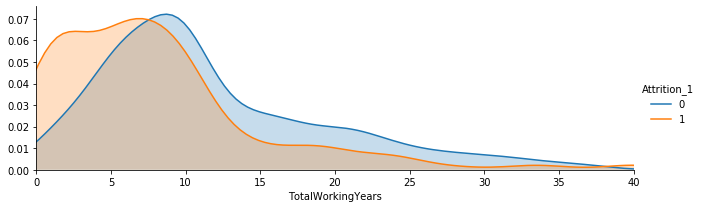

In [92]:
#TotalWorkingYears
facet3 = sns.FacetGrid(full_data,hue = 'Attrition_1' ,aspect=3)  #a way to visualized multi-dimensional data ( 3 dimensions here--> row, col, hue)
facet3.map(sns.kdeplot,'TotalWorkingYears',shade = True)

#map is a function to pass ur chart -->sns.kdeplot here 
facet3.set(xlim=(0,full_data['TotalWorkingYears'].max()))
facet3.add_legend()

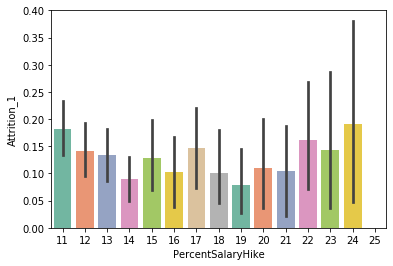

In [93]:
#PercentSalaryHike
sns.barplot(x = 'PercentSalaryHike',y = 'Attrition_1',data = full_data,palette = 'Set2')

In [0]:
#build up datdaset for modeling

#onehot and get_dummies
categorial_data = pd.DataFrame()
for i in full_data.columns:
    if full_data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(full_data[i],prefix=i)
        cata_result = pd.concat([categorial_data,cata],axis=1)

In [0]:
#remove object data type and use onehot 
for i in full_data.columns:
  if full_data[i].dtype == 'O':
    full_data = full_data.drop(i,axis = 1)
#append the onehot tgt with continuous data
full_data = pd.concat([full_data,categorial_data],axis = 1)

In [0]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [0]:
#resplit the dataset
training_data =full_data[full_data['user_id'].isin(train['user_id'])]

In [0]:
test_data = full_data[full_data['user_id'].isin(test['user_id'])]

In [0]:
X = training_data.drop(columns = ['user_id','Attrition_1'],axis = 1)
Y = training_data['Attrition_1']

In [0]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=33)


In [0]:
#Logistic Regression 
#normalization
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [117]:
lr = LogisticRegression()
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

LR准确率: 0.8639


In [0]:
#other models 
models = {}
models['DecisionTree'] = DecisionTreeClassifier()  
models['SVM'] = svm.SVC()
models['RandomForest'] = RandomForestClassifier()



In [123]:
for model in models:
  models[model].fit(train_x,train_y)
  test_predict = models[model].predict(test_x)
  print('{}'.format(model) + '准确率:' + ' %0.4lf' % accuracy_score(test_predict, test_y))
  score = cross_val_score(models[model],X,Y,cv=5,scoring='accuracy')
  print("%s:%.3f(%.3f)"%(model,score.mean(),score.std()))

DecisionTree准确率: 0.7585
DecisionTree:0.761(0.023)
SVM准确率: 0.8571
SVM:0.840(0.002)
RandomForest准确率: 0.8537
RandomForest:0.849(0.004)


In [122]:
# As a result, we found that the best model here is Logistic Regression


,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,Y,No,14,3,4,80,0,10,3,2,10,3,9,7
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2
2,981,35,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,4,Female,67,3,2,Sales Executive,3,Married,4614,23288,0,Y,Yes,18,3,3,80,1,5,0,2,4,2,3,2
3,785,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,1,Male,61,3,3,Healthcare Representative,4,Married,10322,26542,4,Y,No,20,4,4,80,1,14,6,3,11,10,11,1
4,1332,29,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,4,Male,73,2,1,Research Scientist,4,Single,2439,14753,1,Y,Yes,24,4,2,80,0,1,3,2,1,0,1,0


In [133]:
test_data = test_data.set_index('user_id')
print(test_data.shape)

(294, 24)


In [0]:
#remove the label that was assigned before for data cleaning
test_data = test_data.drop('Attrition_1',axis = 1)

In [136]:
test_data.shape

(294, 23)

In [0]:
result = lr.predict(test_data)

In [0]:
result2 = lr.predict_proba(test_data)

In [155]:
test_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,result
user_id,,,,,,,,,,,,,,,,,,,,,,,,
442,36,635,10,4,2,32,3,3,4,9980,15318,1,14,3,4,0,10,3,2,10,3,9,7,4.486161e-95
1091,33,575,25,3,4,44,2,2,2,4320,24152,1,13,3,4,0,5,2,3,5,3,0,2,1.000000e+00
981,35,662,18,4,4,67,3,2,3,4614,23288,0,18,3,3,1,5,0,2,4,2,3,2,1.000000e+00
785,40,1492,20,4,1,61,3,3,4,10322,26542,4,20,4,4,1,14,6,3,11,10,11,1,1.000000e+00
1332,29,459,24,2,4,73,2,1,4,2439,14753,1,24,4,2,0,1,3,2,1,0,1,0,1.000000e+00


In [0]:
#test_data['result'] = result2
test_data.reset_index(inplace = True)

In [0]:
submission = pd.DataFrame(test_data[['user_id','result']])

In [0]:
submission.to_csv('submission_test1')

In [163]:
import os 
os.getcwd()

'/content'

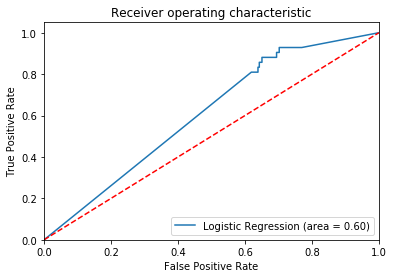

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, predict_y)
fpr, tpr, thresholds = roc_curve(test_y, lr.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()